<a href="https://colab.research.google.com/github/AFSAL-HANEEFA/smoking_habit_detction/blob/main/smoking_habit_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [ ]:
data= pd.read_csv("/content/Train_Data.csv")
data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [ ]:
data['sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
data['smoker'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
data['region'].unique()

array(['northeast', 'southeast', 'northwest', 'southwest'], dtype=object)

In [ ]:
data.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.shape

(3630, 7)

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [ ]:
data["sex"].replace({'male': 1, 'female': 0}, inplace=True)
data['smoker'].replace({'no': 0, 'yes': 1}, inplace=True)
data['region'].replace({'northeast': 0,'southeast': 1,'northwest':2,'southwest':3}, inplace=True)
data

,age,sex,bmi,smoker,region,children,charges
0,21.000000,1,25.745000,0,0,2,3279.868550
1,36.976978,0,25.744165,1,1,3,21454.494239
2,18.000000,1,30.030000,0,1,1,1720.353700
3,37.000000,1,30.676891,0,0,3,6801.437542
4,58.000000,1,32.010000,0,1,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,0,41.426984,0,2,4,10987.324964
3626,38.661977,0,26.202557,0,1,2,11735.844352
3627,56.000000,1,40.300000,0,3,0,10602.385000
3628,48.061207,0,34.930624,0,1,1,8976.140452


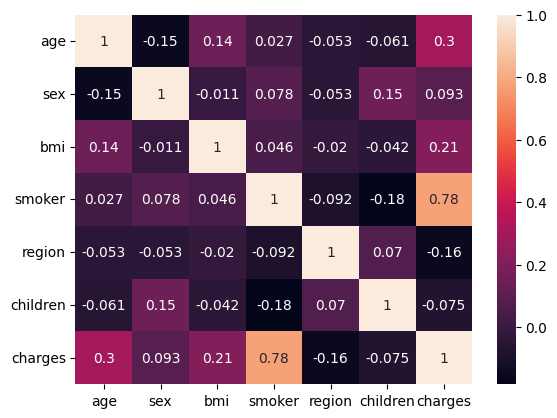

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [ ]:
X=data.drop(columns=['smoker'],axis=1)
Y=data['smoker']
X.head()


,age,sex,bmi,region,children,charges
0,21.000000,1,25.745000,0,2,3279.868550
1,36.976978,0,25.744165,1,3,21454.494239
2,18.000000,1,30.030000,1,1,1720.353700
3,37.000000,1,30.676891,0,3,6801.437542
4,58.000000,1,32.010000,1,1,11946.625900


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1, random_state=2)
print(X.shape,X_train.shape,X_test.shape)


(3630, 6) (3267, 6) (363, 6)


In [ ]:
model = svm.SVC(kernel='linear')
model.fit(X_train,Y_train)


SVC(kernel='linear')

In [ ]:
test_predict=model.predict(X_test)
print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_predict))
print("Precision on testing data:", metrics.precision_score(Y_test, test_predict))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_predict))


Accuracy on testing data:  0.953168044077135
Precision on testing data: 0.90625
Recall on testing data:  0.8405797101449275


TN=288, FP=6, FN=11, TP=58


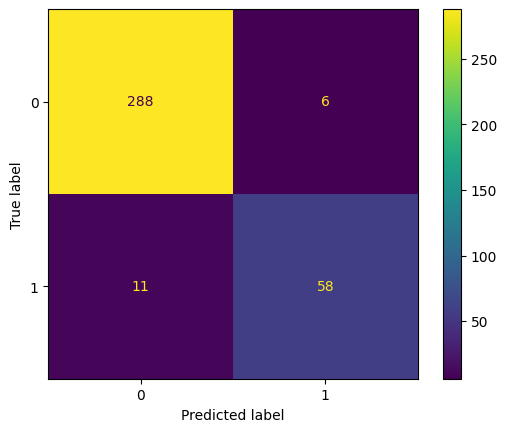

In [ ]:
cm = metrics.confusion_matrix(Y_test, test_predict)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
PROTECTED  =  "sex"
male =  1.0 #male
female = 0.0 #women
men_indices = np.where(X_test[PROTECTED] == male)[0]
women_indices = np.where(X_test[PROTECTED] == female)[0]
print(men_indices, "No of Men =", men_indices.size)
print(women_indices, "No of Women =", women_indices.size)

[  1   5   6   7  11  12  14  15  16  18  20  21  23  28  31  32  33  34
  35  38  41  42  44  46  47  48  52  53  54  55  56  57  61  62  64  66
  67  69  71  73  75  76  77  78  79  81  84  85  86  88  89  90  91  92
  95  97  99 100 101 104 105 108 110 112 113 114 116 117 119 121 122 123
 124 125 127 129 132 136 138 139 140 146 147 148 149 150 151 152 153 154
 155 158 159 161 162 164 165 168 169 170 173 174 176 177 178 181 183 184
 189 190 191 192 193 194 195 197 198 200 203 205 207 208 209 212 214 215
 217 218 219 223 224 225 227 230 231 232 233 235 238 240 244 245 246 247
 249 252 253 254 255 259 260 261 263 264 265 266 268 270 271 272 273 278
 280 281 282 283 284 286 287 288 289 290 296 298 304 305 306 307 308 309
 310 311 312 313 314 318 319 320 328 329 330 333 335 336 339 340 343 346
 348 350 351 352 355 356 357 358 360 361 362] No of Men = 209
[  0   2   3   4   8   9  10  13  17  19  22  24  25  26  27  29  30  36
  37  39  40  43  45  49  50  51  58  59  60  63  65  68  70  

In [ ]:
Y_test_m = [Y_test.values[i] for i in men_indices]
Y_test_f = [Y_test.values[i] for i in women_indices]
print(Y_test_m)
print(Y_test_f)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
test_predict_m = [test_predict[i] for i in men_indices]
test_predict_f = [test_predict[i] for i in women_indices]
print(test_predict_m)
print(test_predict_f)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
print("Accuracy on testing data: ", metrics.accuracy_score(Y_test_m, test_predict_m))
print("Precision on testing data:", metrics.precision_score(Y_test_m, test_predict_m))
print("Recall on testing data: ", metrics.recall_score(Y_test_m, test_predict_m))


Accuracy on testing data:  0.9282296650717703
Precision on testing data: 0.8863636363636364
Recall on testing data:  0.7959183673469388


In [ ]:
print("Accuracy on testing data: ", metrics.accuracy_score(Y_test_f, test_predict_f))
print("Precision on testing data:", metrics.precision_score(Y_test_f, test_predict_f))
print("Recall on testing data: ", metrics.recall_score(Y_test_f, test_predict_f))


Accuracy on testing data:  0.987012987012987
Precision on testing data: 0.95
Recall on testing data:  0.95


TN_m=155, FP_m=5, FN_m=10, TP_m=39


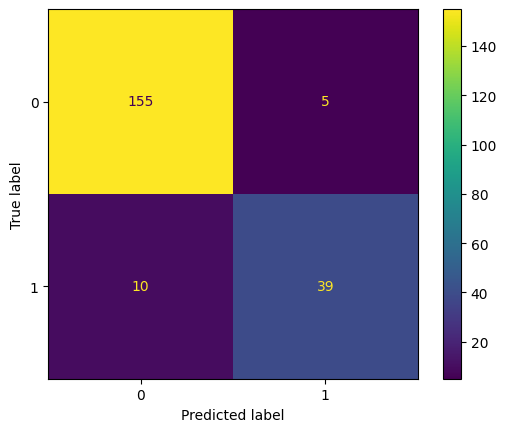

positive_rate 0.96875


In [ ]:
cm = metrics.confusion_matrix(Y_test_m, test_predict_m)
TP_m, FN_m, FP_m, TN_m = cm.ravel()
print("TN_m={0}, FP_m={1}, FN_m={2}, TP_m={3}".format(TP_m, FN_m, FP_m, TN_m))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
positive_rate=(TP_m/float(TP_m+FN_m))
print('positive_rate',positive_rate)

TN_f=133, FP_f=1, FN_f=1, TP_f=19


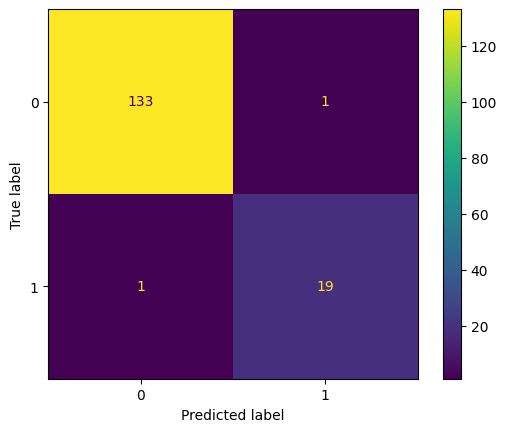

positive_rate 0.9925373134328358


In [ ]:
cm = metrics.confusion_matrix(Y_test_f, test_predict_f)
TP_f, FN_f, FP_f, TN_f = cm.ravel()
print("TN_f={0}, FP_f={1}, FN_f={2}, TP_f={3}".format(TP_f, FN_f, FP_f, TN_f))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
positive_rate=(TP_f/float(TP_f+FN_f))
print('positive_rate',positive_rate)

In [ ]:
print(metrics.classification_report(Y_test_m,test_predict_m))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       160
           1       0.89      0.80      0.84        49

    accuracy                           0.93       209
   macro avg       0.91      0.88      0.90       209
weighted avg       0.93      0.93      0.93       209



In [ ]:
print(metrics.classification_report(Y_test_f, test_predict_f))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       134
           1       0.95      0.95      0.95        20

    accuracy                           0.99       154
   macro avg       0.97      0.97      0.97       154
weighted avg       0.99      0.99      0.99       154

